<a href="https://colab.research.google.com/github/Nadian-Ali/GeoImageClassificaiton/blob/main/exploreImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import drive
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive", force_remount =True)


Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Projects/GeoSampleClassification/data

/content/drive/My Drive/Projects/GeoSampleClassification/data


In [3]:
import os
import numpy as np
from google.colab.patches import cv2_imshow

In [4]:

pth = os.path.join(os.getcwd(),'full_image_crc2.las')

In [5]:
def FMI_reader(path):
    # f = open(path, 'r')
    # content = f.readlines()
    # f.close()
    with open(path,'r') as file:
      content  = file.readlines()
    data = []
    depth = []
    rock_type = path.split('.')[0].split('_')[0].split('/')[-1]
    for L in content:
        L = L.split(' ')
        res = [st for st in L if st != "" and st != '\n']
        if res[0] == '~Ascii':
            continue
        elif res[0] == '~Version':
            break
        elif len(res) == 1:
            depth.append(float(res[0]))
        else:
            data.extend(list(map(float, res)))

    data = np.array(data)
    depth = np.array(depth)
    data = data[:-32]
    data = np.reshape(data, (-1, 192))

    return data, depth, rock_type

In [7]:
data, depth, r = FMI_reader(pth)

In [ ]:
np.shape(data)

(365965, 192)

total lenght is:365965 ___ selected offset is 16408


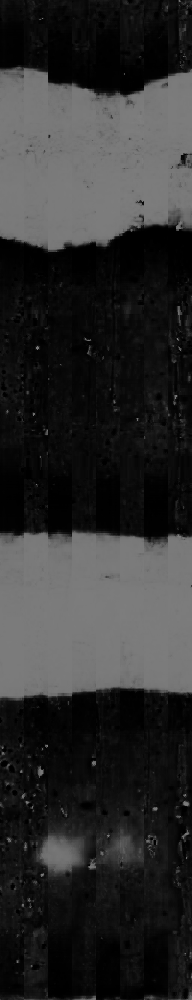

In [63]:
sample_length = 1000
offset = np.random.randint(0,np.shape(data)[0]-sample_length)
offset= 16408
print('total lenght is:{}'.format(np.shape(data)[0]),'___', 'selected offset is {}'.format(offset))
cv2_imshow(data[offset:offset+sample_length:1,:])

In [55]:
# a= np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16],[17,18,19,20],[21,22,23,24],[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16],[17,18,19,20],[21,22,23,24]])
# # print(a)
# print(a[1:4:,:])